In [ ]:
!pip install -U fastbook

In [ ]:
from fastbook import *

In [ ]:
urls = search_images_ddg('Hamburger', max_images=1)

In [ ]:
dest = Path('Hamburger.jpg')

In [ ]:
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

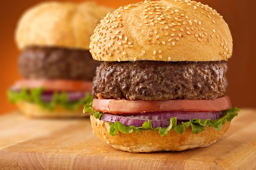

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
import os
searches = 'Hamburger', 'Hotdog'
path = Path('Hamburger_or_not')

if not path.exists():
  for o in searches:
    dest = (path/o)
    os.makedirs(dest, exist_ok = True)
    results = search_images_ddg(f'{o} photo')
    download_images(dest, urls = results [:200])
    resize_images(dest, max_size = 400, dest = dest)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#20) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
dls = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                get_y = parent_label,
                item_tfms = [Resize(192, method = 'squish')]
                ).dataloaders(path)

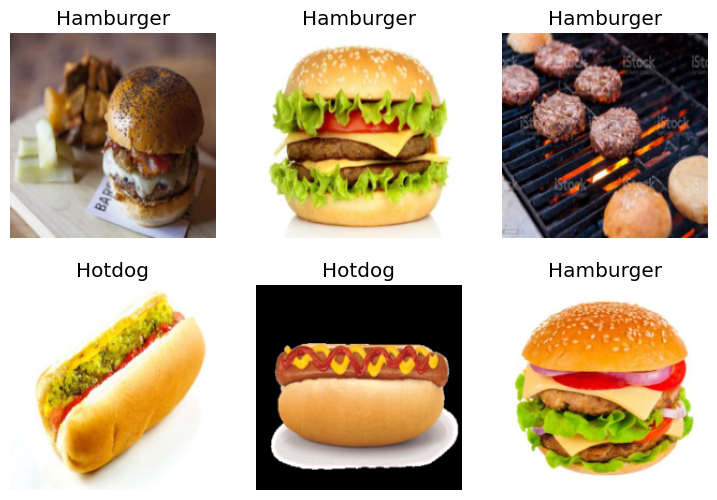

In [ ]:
dls.show_batch(max_n = 6)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

epoch,train_loss,valid_loss,error_rate,time
0,1.143185,0.094597,0.042254,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.236971,0.047383,0.028169,00:57
1,0.155848,0.047738,0.014085,00:59
2,0.106965,0.044969,0.014085,00:58


In [ ]:
is_hamburger,_,probs = learn.predict(PILImage.create('/content/Hamburger_or_not/Hotdog/002aaab1-fc30-4758-a1c0-c2ce6e7d6019.png'))
print(f'This is a: {is_hamburger}.')
print(f'Probability it\'s a Hamburger: {probs[0]:.4f}')

This is a: Hotdog.
Probability it's a Hamburger: 0.0000
